<a href="https://colab.research.google.com/github/TheMikeste1/cse380-notebooks/blob/master/10_2_Ponder_and_Prove_Spanning_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

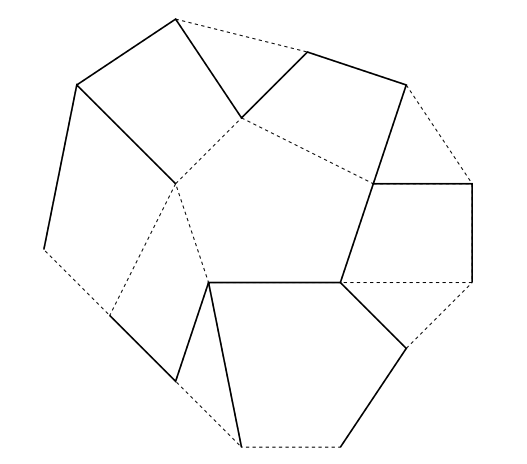

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

### Response

This will be completed after the "What to Create" section, [here](#scrollTo=qviE3mFPsCTi).

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

# TODO My Report on What I Did and What I Learned

## Response

### 1. Graph Representation

I usually use a dictionary to represent a graph, but this time I'd like to use an incidence matrix. It will work like so:

- The matrix will be represented by a 2D list of bools.
- The nodes will be enumerated starting at 0. The $0^{th}$ node will be represented by the $0^{th}$ column of the matrix.
- Each row of the matrix represents a link. The nodes incident to the link will have `True` in the appropriate column.

This will create a matrix that looks like this:

|          | 0 | 1 | 2 | 3 |
|:--------:|:-:|:-:|:-:|:-:|
| **0, 3** | T | F | F | T |
| **1, 3** | F | T | F | T |
| **0, 2** | T | F | T | F |

As code, it would be represented like so:

In [ ]:
graph_representation = [
   [True, False, False, True]
  ,[False, True, False, True]
  ,[True, False, True, False]
  ]

If the nodes *must* remain named, the inner lists can be replaced with dictionaries. Likewise, if the links must be named, the top-level list can be replaced with a dictionary.

### 2. Graph -> Nodes

To get the list of nodes, we simply return a list from $0$ to $n$, where $n$ is the number of columns in the matrix - 1.

In [ ]:
def get_nodes(graph: [[bool]]):
  return list(range(len(graph[0])))

As a quick test, we'll send the graph made in [Graph Representation](#scrollTo=oAMxTWgYPo18). The output should be `[0, 1, 2, 3]`.

In [ ]:
get_nodes(graph_representation)

[0, 1, 2, 3]

### 3. Graph -> Links

The list of links will be a little more complicated, but not terribly difficult. To generate them, we will iterate through each row of the matrix, determining which two nodes are incident. For each row, we will turn these two nodes into a tuple in form `(a, b)`, where `a` is the first node and `b` is the second.

In [ ]:
def name_link(incidents: [bool]):
  inci = [i for i, val in enumerate(incidents) if val]  # This could be replaced with a filter and a map if we wanted to use functional tools
  a = inci[0]
  # This check exists to allow for pseudographs and check for graphs with invalid links.
  if len(inci) == 1:
    b = a
  elif len(inci) == 2:
    b = inci[1]
  else:
    raise Exception("Invalid incident list has more than 2 nodes! " + str(incidents))
  return a, b


def get_links(graph: [[bool]]):
  return map(name_link, graph)

For our preliminary test, we'll use the [Graph Representation](#scrollTo=oAMxTWgYPo18) graph. We should get `[(0, 3), (1, 3), (0, 2)]`.

In [ ]:
list(get_links(graph_representation))

[(0, 3), (1, 3), (0, 2)]

### 4. Graph -> Adjacency List

According to First Three Odds, an adjacency list is "a table with one row per node, listing each node’s adjacent nodes." This will be represented with a set of rows, the $0^{th}$ row representing node 0. Each row will consist of a sorted list of links containing adjacent nodes. I'd prefer to return just a list of adjacent nodes for each node, but I'm taking "returns an adjacency list of nodes and links" as wanting the links in the list.

To generate this list, we'll get a list of links and iterate through it to find all the adjacencies. As we move through it, we'll append those values to the relevant rows.

In [ ]:
def get_adj_list(graph: [[bool]]):
  # More efficient method
  """
  # Initialize the adjacency list so we can fill it easily.
  adj = [list() for _ in range(len(graph[0]))]
  # Go through the list of links creating the table.
  list(map(lambda link: (adj[link[0]].append(link), adj[link[1]].append(link)), 
           get_links(graph)))
  # Sort and return the list.
  return list(map(sorted, adj))
  """
  # This pure functional method is less efficient due to filtering over links
  # multiple times, but is cool because it's pure functional. 
  # The "links" assignment is equivalent to a "let" in Haskell.
  # The map could be replace with list comprehension is we wanted to be able
  # to index the adjacency list. However, the map creates a generator, which
  # is nice if we want to build the list over time.
  return map(lambda i : sorted(filter(lambda link: i in link, get_links(graph))), 
             range(len(graph[0])))

Again, as a basic test we'll use the [Graph Representation](#scrollTo=oAMxTWgYPo18) graph. The result should be a list representing this table:

| Node | Adjacencies      |
|:----:|------------------|
|   0  | [(0, 2), (0, 3)] |
|   1  | [(1, 3)]         |
|   2  | [(0, 2)]         |
|   3  | [(0, 3), (1, 3)] |


In [ ]:
for i, row in enumerate(get_adj_list(graph_representation)):
  print(i, list(row))

0 [(0, 2), (0, 3)]
1 [(1, 3)]
2 [(0, 2)]
3 [(0, 3), (1, 3)]


### 5. Graph, Node -> Adjacencies

This one is crazy simple. We could either use the adjacency list we've made, or strip it down so it'll be more efficient. We'll take the stripped-down approach so we're not wasting cycles.

In [ ]:
def get_adjacencies(graph: [[bool]], node: int):
  nodes = map(
      lambda link: 
        link[1] if link[0] == node 
        else link[0] if link[1] == node 
        else None
    , get_links(graph))
  return sorted(filter(lambda x: x is not None, nodes))

Again, a simple test. The output should be the same as [Graph -> Adjacency List](#scrollTo=opZGdAwmZFhH), but with the tuples replaced simply the adjacent node: 

| Node | Adjacencies |
|:----:|-------------|
|   0  | [2, 3]      |
|   1  | [3]         |
|   2  | [0]         |
|   3  | [0, 1]      |

In [ ]:
from functools import partial

get_adj_rep = partial(get_adjacencies, graph_representation)
for i in range(len(graph_representation[0])):
  print(i, get_adj_rep(i))

0 [2, 3]
1 [3]
2 [0]
3 [0, 1]


### Spanning Tree Algorithm

We'll first need to get a list of valid nodes. Then we'll select the first of those nodes as our frontier, and get the valid links incident to that node. We'll select the first node again and repeat.

In [ ]:
def choose_frontier_link(graph, frontier):
  for node in frontier:
    valid_nodes = filter(lambda n: n not in frontier, get_adjacencies(graph, node))
    for v_node in valid_nodes:
      # This will only be reached if there is a valid node. That way we don't
      # have to filter all nodes each time.
      return node, v_node


def make_incidence_list(nodes, link):
  incidence = [False] * len(nodes)
  incidence[link[0]] = incidence[link[1]] = True
  return incidence


def make_spanning_tree(graph):
  nodes = get_nodes(graph)
  frontier = {nodes[0]}
  spanning_tree = []
  while len(frontier) != len(nodes):
    # This function returns the new chosen 
    # link in form (frontier_node, new_node)
    new_link = choose_frontier_link(graph, frontier)
    # Add the new node
    frontier.add(new_link[1])
    # Record the link
    spanning_tree.append(make_incidence_list(nodes, new_link))
  return spanning_tree

Let's make some code to make a dot graph to ensure this is working correctly.

In [ ]:
#!pip install graphviz

In [ ]:
from graphviz import Graph


def make_dot_graph(graph):
  dot = Graph(format='png')
  # Add all the nodes in case there are isolated nodes
  list(map(dot.node, map(str, get_nodes(graph))))
  # Get the set of links so we don't have repeats.
  # This still allows for multiple links so long as they invert the tuple
  # e.g. (1, 2) and (2, 1) are both allowed.
  links_set = set([link for sublist in get_adj_list(graph) for link in sublist])
  # For each tuple, take the values and make an edge
  for a, b in map(lambda x: (str(x[0]), str(x[1])), links_set):
    dot.edge(a, b)
  return dot

Unfortunately our graph representation tree is already a spanning tree, but we can test a new one.

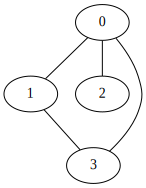

In [ ]:
test_tree = [  # This tree is the same as graph_representation but with an extra link from 0 to 1
   [True, False, False, True]
  ,[False, True, False, True]
  ,[True, False, True, False]
  ,[True, True, False, False]
  ]
make_dot_graph(test_tree)

Now let's test our spanning tree code.

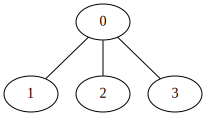

In [ ]:
make_dot_graph(make_spanning_tree(test_tree))

Excellent, that looks correct. Note there are multiple spanning trees. We've arbitrarily broken ties between possible trees by choosing the lowest node as our preferred node.

### Testing Trees

For testing, I will first output the graph, then output the spanning tree. Note that, while not all nodes are nicely aligned, the initial graphs are ladders or whatever type of graph specified.

For larger graphs, this code will make it easier to create the incident matrix.

In [ ]:
def make_graph(num_nodes, links):
  graph = []
  for link in links:
    a, b = tuple(map(int, link.split('-')))
    incident = [False] * num_nodes
    incident[a], incident[b] = True, True
    graph.append(incident)
  return graph

#### 2 rungs

In [ ]:
rungs_2 = [
   [True, True, False, False]  # Rung 0-1
  ,[True, False, True, False]
  ,[False, False, True, True]  # Rung 2-3
  ,[False, True, False, True]
  ]

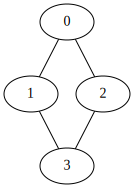

In [ ]:
make_dot_graph(rungs_2)

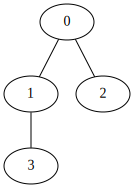

In [ ]:
make_dot_graph(make_spanning_tree(rungs_2))

#### 3 rungs

In [ ]:
rungs_3 = [
   [True, True, False, False, False, False]  # Rung 0-1
  ,[True, False, True, False, False, False]
  ,[False, False, True, True, False, False]  # Rung 2-3
  ,[False, True, False, True, False, False]

  ,[False, False, True, False, True, False]
  ,[False, False, False, True, False, True]
  ,[False, False, False, False, True, True]  # Rung 4-5
  ]

It doesn't look like a ladder until you squish 0 and 1 onto the same level, shifting all the RHS nodes down as well.

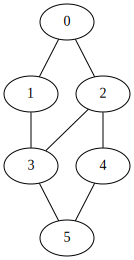

In [ ]:
make_dot_graph(rungs_3)

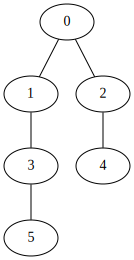

In [ ]:
make_dot_graph(make_spanning_tree(rungs_3))

#### 4 rungs

In [ ]:
rungs_4 = [
   [True, True, False, False, False, False, False, False]  # Rung 0-1
  ,[True, False, True, False, False, False, False, False]
  ,[False, False, True, True, False, False, False, False]  # Rung 2-3
  ,[False, True, False, True, False, False, False, False]

  ,[False, False, True, False, True, False, False, False]
  ,[False, False, False, True, False, True, False, False]
  ,[False, False, False, False, True, True, False, False]  # Rung 4-5

  ,[False, False, False, False, True, False, True, False]
  ,[False, False, False, False, False, True, False, True]
  ,[False, False, False, False, False, False, True, True]  # Rung 6-7
  ]

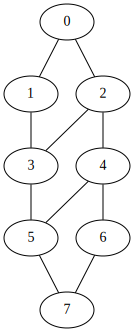

In [ ]:
make_dot_graph(rungs_4)

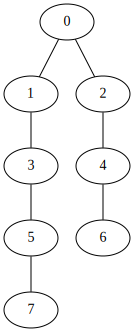

In [ ]:
make_dot_graph(make_spanning_tree(rungs_4))

#### 5 rungs

In [ ]:
rungs_5 = [
   [True, True, False, False, False, False, False, False, False, False]  # Rung 0-1
  ,[True, False, True, False, False, False, False, False, False, False]
  ,[False, False, True, True, False, False, False, False, False, False]  # Rung 2-3
  ,[False, True, False, True, False, False, False, False, False, False]

  ,[False, False, True, False, True, False, False, False, False, False]
  ,[False, False, False, True, False, True, False, False, False, False]
  ,[False, False, False, False, True, True, False, False, False, False]  # Rung 4-5

  ,[False, False, False, False, True, False, True, False, False, False]
  ,[False, False, False, False, False, True, False, True, False, False]
  ,[False, False, False, False, False, False, True, True, False, False]  # Rung 6-7

  ,[False, False, False, False, False, False, True, False, True, False]
  ,[False, False, False, False, False, False, False, True, False, True]
  ,[False, False, False, False, False, False, False, False, True, True]  # Rung 8-9
  ]

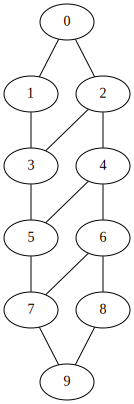

In [ ]:
make_dot_graph(rungs_5)

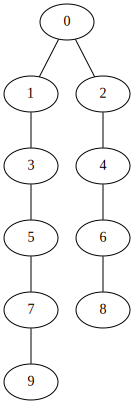

In [ ]:
make_dot_graph(make_spanning_tree(rungs_5))

#### Notebook Graph

The notebook graph will be represented like so:

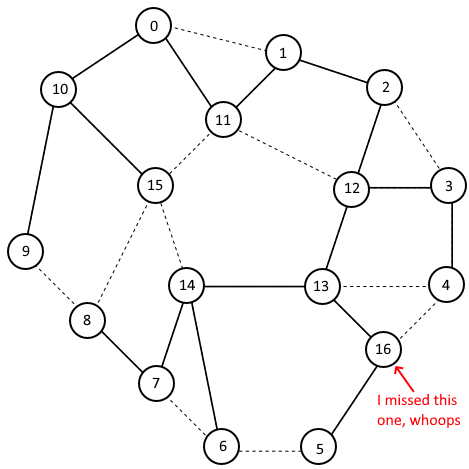

I initially missed node 16, but I added it afterwards.

In [ ]:
notebook_graph = make_graph(17, [
  # Outer circle
    "0-1"
  , "1-2"
  , "2-3"
  , "3-4"
  , "4-16"
  , "16-5 "
  , "5-6"
  , "6-7"
  , "7-8"
  , "8-9"
  , "9-10"
  , "10-0"
  # Inner circle
  , "11-12"
  , "12-13"
  , "13-14"
  , "14-15"
  , "15-11"
  # Outer to Inner
  , "0-11"
  , "1-11"
  , "2-12"
  , "3-12"
  , "4-13"
  , "16-13"
  , "6-14"
  , "7-14"
  , "8-15"
  , "10-15"])

It's not pretty, but it's equivalent.

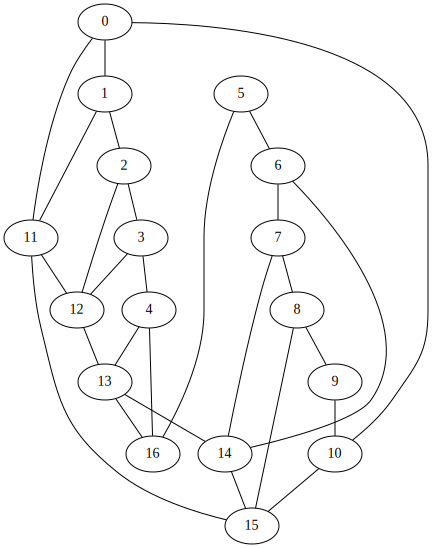

In [ ]:
make_dot_graph(notebook_graph)

Node 9 and its children should be flipped and put under node 10, but this is a tree.

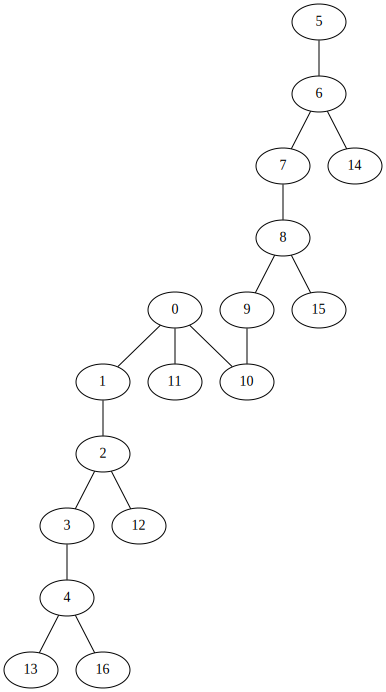

In [ ]:
make_dot_graph(make_spanning_tree(notebook_graph))

#### Large Trees

I'm too lazy to make my own large graphs, so I'll make a random generator.

In [ ]:
from random import randint

def generate_graph(num_nodes, num_links):
  links = set()

  if num_links < num_nodes - 1:
    raise Exception(f"Too few links for {num_nodes} nodes. Min number is {num_nodes - 1}.")

  max_links = num_nodes * (num_nodes - 1) // 2
  if num_links > max_links:
    raise Exception(f"Too many links for {num_nodes} nodes. Max number is {max_links}.")

  num_nodes -= 1  # Subtract 1 since randint is inclusive
  # First we'll start by linking all nodes to some other node to eliminate 
  # any islands. Note this will allow for separate clusters.
  for node_a in range(num_nodes + 1):
    added = False
    while not added:
      node_b = randint(0, num_nodes)

      # If they're the same, try again
      if node_a == node_b:
        continue
      # For easier checking for dupes, node_a will be the lowest node
      if node_b < node_a:
        node_a, node_b = node_b, node_a
      
      # Create the link
      link = str(node_a) + '-' + str(node_b)
      # If this link already exists, try again
      if link in links:
        continue
      # Otherwise, add it
      links.add(link)
      added = True

  # Now we'll just add links until we're at the desired number.
  while len(links) < num_links:
    node_a = randint(0, num_nodes)
    node_b = randint(0, num_nodes)

    # If they're the same, try again
    while node_a == node_b:
      node_b = randint(0, num_nodes)
    # For easier checking for dupes, node_a will be the lowest node
    if node_b < node_a:
      node_a, node_b = node_b, node_a
    
    # Create the link
    link = str(node_a) + '-' + str(node_b)
    # If this link already exists, try again
    if link in links:
      continue
    # Otherwise, add it
    links.add(link)
  return links

##### 1

In [ ]:
from random import seed

seed(314159)

num_nodes = 21
large_1 = make_graph(num_nodes, generate_graph(num_nodes, 41))

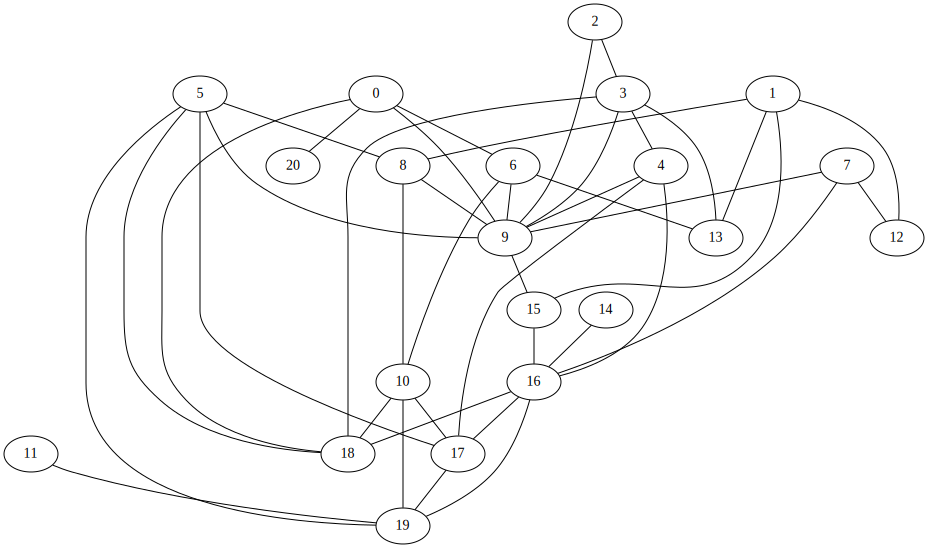

In [ ]:
make_dot_graph(large_1)

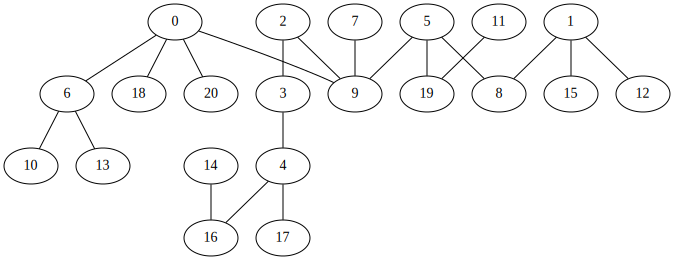

In [ ]:
make_dot_graph(make_spanning_tree(large_1))

##### 2

In [ ]:
from random import seed

seed(161803)

num_nodes = 52
large_2 = make_graph(num_nodes, generate_graph(num_nodes, 75))

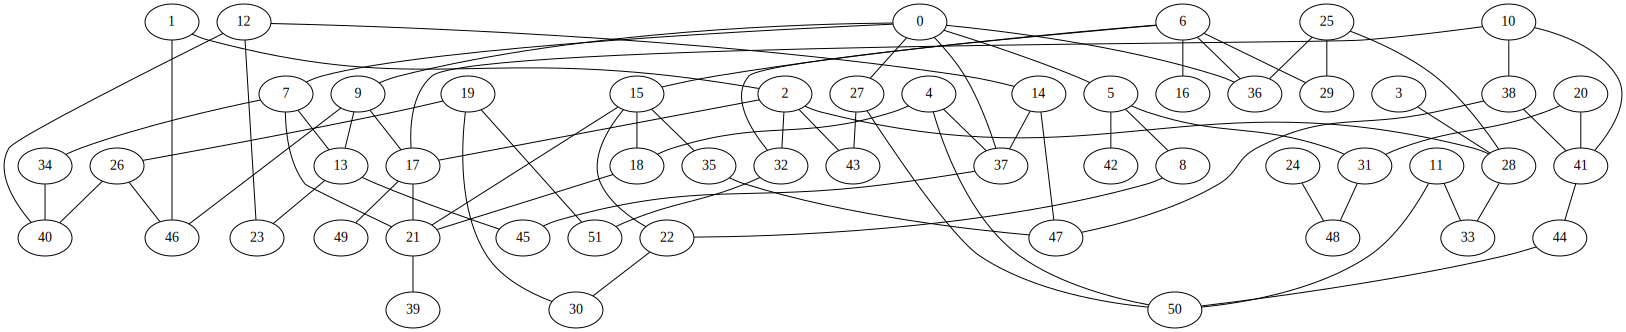

In [ ]:
make_dot_graph(large_2)

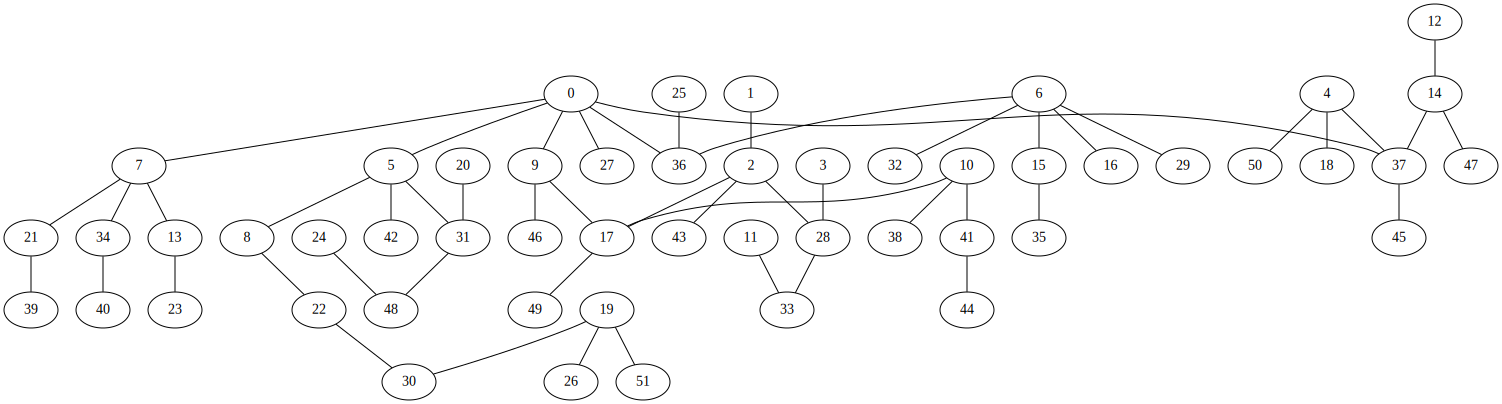

In [ ]:
make_dot_graph(make_spanning_tree(large_2))

##### 3

In [ ]:
from random import seed

seed(271828)

num_nodes = 45
large_3 = make_graph(num_nodes, generate_graph(num_nodes, 105))

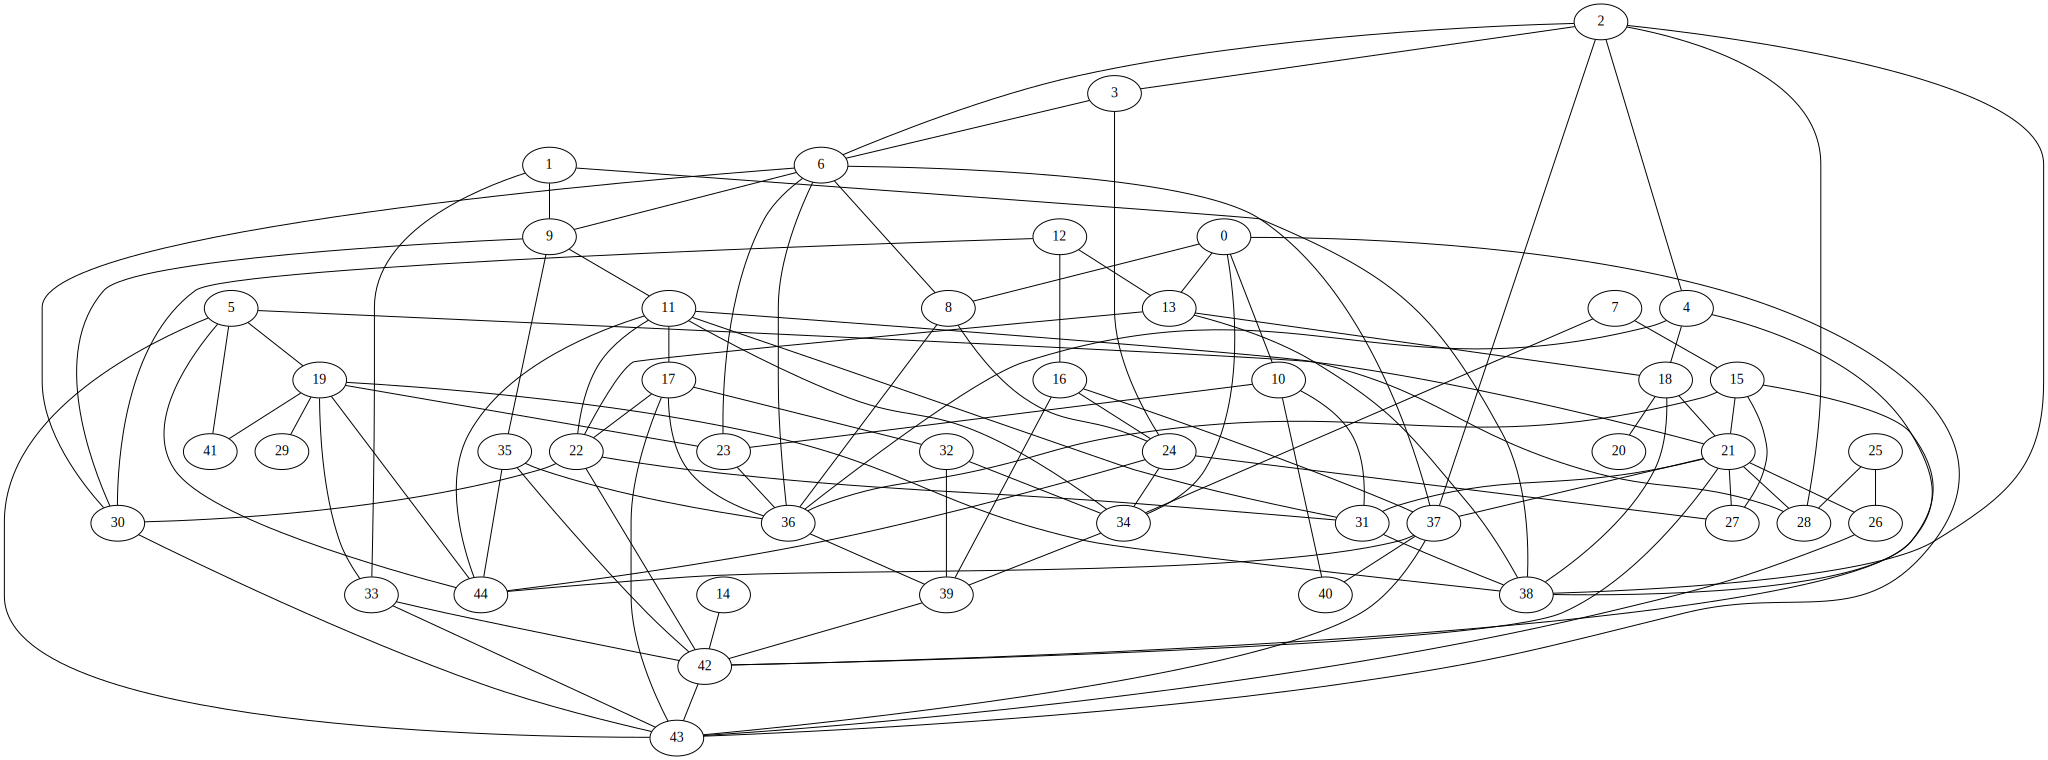

In [ ]:
make_dot_graph(large_3)

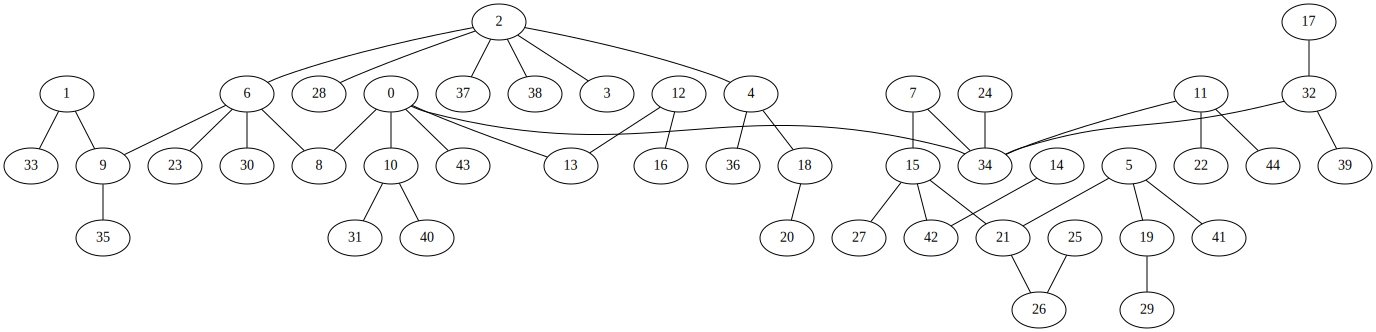

In [ ]:
make_dot_graph(make_spanning_tree(large_3))

## Fun


While I've already worked with graphs before, I had a blast tryingusing an incidence matrix instead of the typically object-oriented or dictionary approach I take. It was also fun making a random graph generator and testing my code with it.

## New

I learned how different approaches to representing a graph are useful. I found many of the functions I had to write to handle my graph were easier than when I used a dictionary, though a couple were more difficult.

## Meaningful


Graphs are extremely important in computer science, and I feel this was a good exercise in learning for to use and represent them.

## Other

**Collaborators:**\
Michael Hegerhorst - Author

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [ ]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

### TA Comments

Phenomenal job! Keep up the awesome work!